## Step 1:
Import certain libraries and then create a Dataframe of the dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Order_Details = pd.read_csv('Downloads/Order_details(masked).csv')
Order_Details

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46
...,...,...,...,...
576,PERSON_522,PERSON_522@gmail.com,"PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PR...",07/03/2021 23:53:03
577,PERSON_523,PERSON_523@gmail.com,PRODUCT_8,07/03/2021 23:55:01
578,PERSON_523,PERSON_523@gmail.com,"PRODUCT_36,PRODUCT_14,PRODUCT_64,PRODUCT_28,PR...",07/03/2021 23:58:24
579,PERSON_524,PERSON_524@gmail.com,"PRODUCT_75,PRODUCT_71,PRODUCT_86,PRODUCT_63,PR...",07/03/2021 23:59:26


## Step 2:
Create a new column called Time that has the DateTime format after converting the Transaction Date column into it. The DateTime format, which has the pattern **YYYY-MM-DD HH:MM:SS**, can be customized however we choose. Here we extract Hour column from Time column.

In [7]:
# Transaction Time will be Time column in Order_Details
Order_Details['Time'] = pd.to_datetime(Order_Details['Transaction Date'])

# We extract hour from Time column
Order_Details['Hour'] = (Order_Details['Time']).dt.hour

## Step 3:
Require the “n” busiest hours. For that,get the first “n” entries in a list containing the occurrence rates of the hours when the transaction took place.To further simplify the manipulation of the provided data in Python, utilize value counts for frequencies and tolist() to convert to list format.Also compile a list of the associated index values.

In [8]:
# n =24 in this case, can be modified
# as per need to see top 'n' busiest hours
timemost1 = Order_Details['Hour'].value_counts().index.tolist()[:24] 

timemost2 = Order_Details['Hour'].value_counts().values.tolist()[:24]

## Step 4:
Stack the indices (hour) and frequencies together to yield the final result.

In [9]:
tmost = np.column_stack((timemost1,timemost2))

print(" Hour Of Day" + "\t" + "Cumulative Number of Purchases \n")
print('\n'.join('\t\t'.join(map(str, row)) for row in tmost))

 Hour Of Day	Cumulative Number of Purchases 

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


## Step 5:
Before the creation of an appropriate data visualization, the list must be customized slightly. To do so, gather the hourly frequencies and perform the following tasks:

In [10]:
timemost = Order_Details['Hour'].value_counts()
timemost1 = []

for i in range(0,23):
    timemost1.append(i)
    
timemost2 = timemost.sort_index()
timemost2.tolist()
timemost2 = pd.DataFrame(timemost2)

## Step 6:
For data visualization, we choose to use Matplotlib library (we can also plot data graphically with Ggplot, Seaborn, etc.). The commands written below are mainly to ensure that X-axis takes up the values of hours and Y-axis takes up the importance of the number of transactions affected, and also various other aspects of a line chart, including color, font, etc., to name a few.

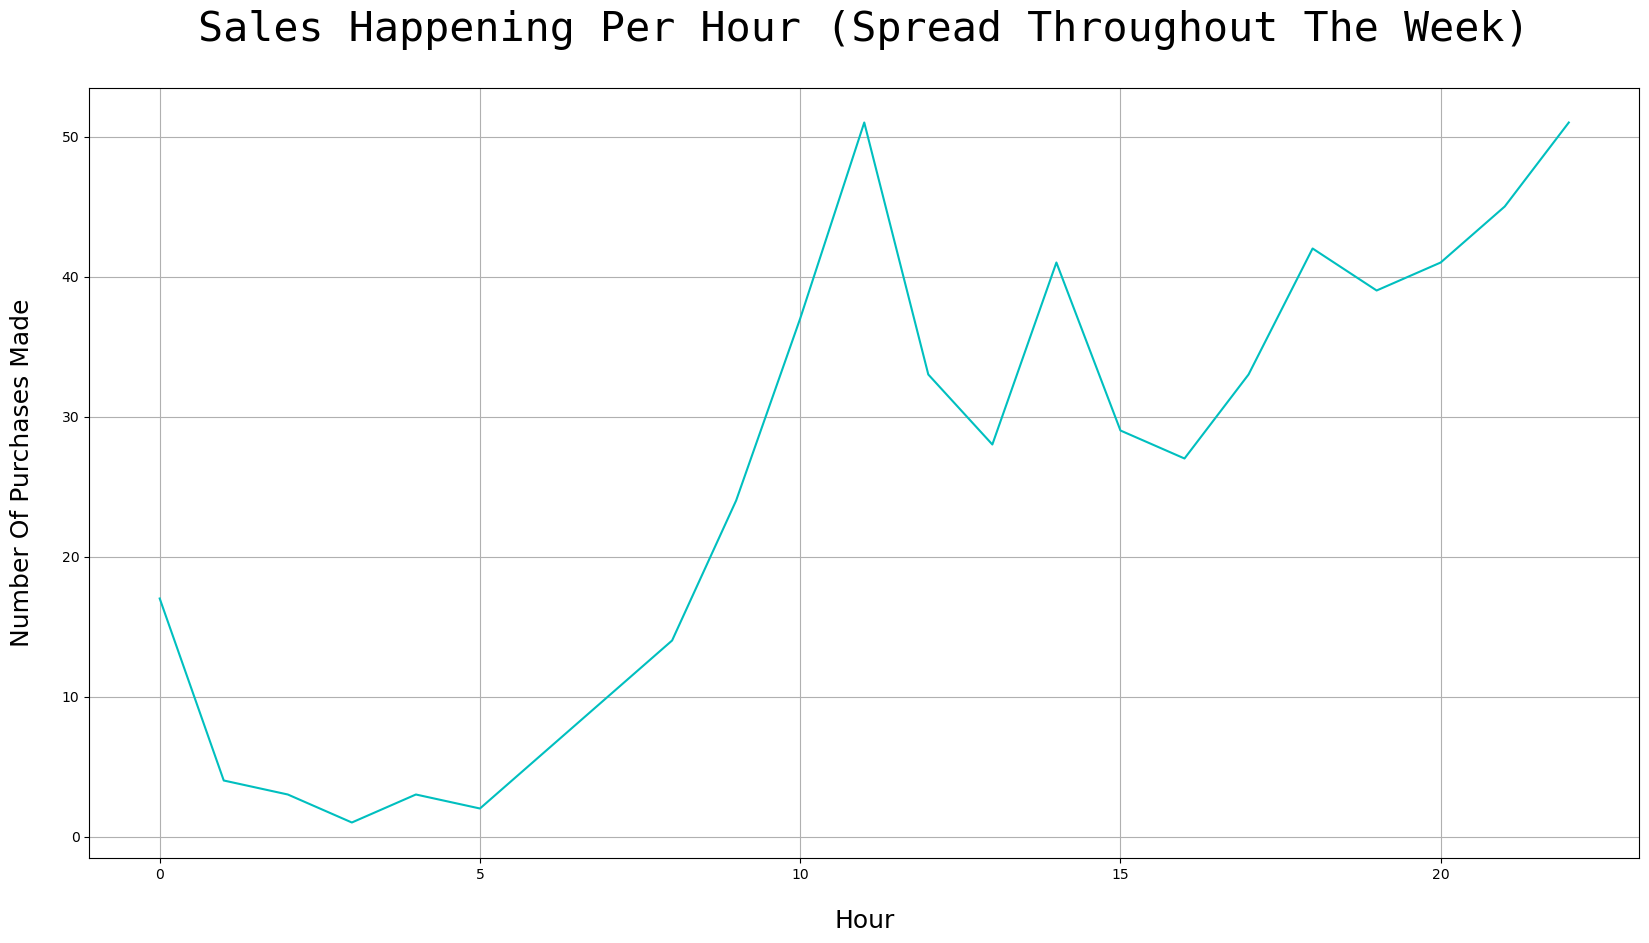

In [14]:
plt.figure(figsize=(20, 10))

plt.title('Sales Happening Per Hour (Spread Throughout The Week)',
          fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1.05)

plt.ylabel("Number Of Purchases Made", fontsize=18, labelpad=20)
plt.xlabel("Hour", fontsize=18, labelpad=20)
plt.plot(timemost1, timemost2, color='c')
plt.grid()
plt.show()